In [49]:
# In this notebook, we are going to look through the HIV-1 protease and reverse transcriptase sequence data. 
# The goal is to determine a strategy for downsampling sequences for phylogenetic tree construction

In [50]:
from Bio import SeqIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
proteases = [s for s in SeqIO.parse('HIV1-protease.fasta', 'fasta')]
proteases

[SeqRecord(seq=Seq('PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKMIGGIGGFI...LNF', SingleLetterAlphabet()), id='B.FR.1983.IIIB_LAI.A04321', name='B.FR.1983.IIIB_LAI.A04321', description='B.FR.1983.IIIB_LAI.A04321', dbxrefs=[]),
 SeqRecord(seq=Seq('PQITLWQRPLVAIKIGGQLKEALLDTGADDTVLEEMNLPGKWKPKMIGGIGGFI...LNF', SingleLetterAlphabet()), id='D.CD.1983.ELI_patent.A07108', name='D.CD.1983.ELI_patent.A07108', description='D.CD.1983.ELI_patent.A07108', dbxrefs=[]),
 SeqRecord(seq=Seq('PQITLWQRPVVTVRVGGQLKEALLDTGADDTVLEEINLPGKWKPKMIGGIGGFI...LNF', SingleLetterAlphabet()), id='A1DK.CD.1985.MAL_patent.A07116', name='A1DK.CD.1985.MAL_patent.A07116', description='A1DK.CD.1985.MAL_patent.A07116', dbxrefs=[]),
 SeqRecord(seq=Seq('PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKMIGGIGGFI...LNF', SingleLetterAlphabet()), id='B.FR.1983.LAI-J19.A07867', name='B.FR.1983.LAI-J19.A07867', description='B.FR.1983.LAI-J19.A07867', dbxrefs=[]),
 SeqRecord(seq=Seq('PQITLWQRPLVAIKIGGQLKEALLDTGADDTVLEEMNLPGKWKPKMIGGI

In [52]:
rts = [s for s in SeqIO.parse('HIV1-RT.fasta', 'fasta')]
rts

[SeqRecord(seq=Seq('PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPEN...KVL', SingleLetterAlphabet()), id='B.FR.1983.HXB2-LAI-IIIB-BRU.K03455', name='B.FR.1983.HXB2-LAI-IIIB-BRU.K03455', description='B.FR.1983.HXB2-LAI-IIIB-BRU.K03455', dbxrefs=[]),
 SeqRecord(seq=Seq('PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPEN...KVL', SingleLetterAlphabet()), id='B.FR.1983.IIIB_LAI.A04321', name='B.FR.1983.IIIB_LAI.A04321', description='B.FR.1983.IIIB_LAI.A04321', dbxrefs=[]),
 SeqRecord(seq=Seq('PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALTEICTDMEKEGKISRIGPEN...KVL', SingleLetterAlphabet()), id='D.CD.1983.ELI_patent.A07108', name='D.CD.1983.ELI_patent.A07108', description='D.CD.1983.ELI_patent.A07108', dbxrefs=[]),
 SeqRecord(seq=Seq('PISPIETVPVKLKPGMDGPRVKQWPLTEEKIKALTEICKDMEKEGKILKIGPEN...KVL', SingleLetterAlphabet()), id='A1DK.CD.1985.MAL_patent.A07116', name='A1DK.CD.1985.MAL_patent.A07116', description='A1DK.CD.1985.MAL_patent.A07116', dbxrefs=[]),
 SeqRecord(seq=Seq('PISPIETVPVKLKPGMDGPK

In [53]:
def extract_metadata(hiv_sequences):
    prot_metadata = []
    for s in rts:
        metadata = s.id.split('.')
        data = dict()
        data['subtype'] = metadata[0]
        data['country'] = metadata[1]
        data['year'] = metadata[2]
        data['name'] = metadata[3]
        data['accession'] = metadata[4]

        prot_metadata.append(data)

    return pd.DataFrame(rt_metadata).replace('-', np.nan)
rt_metadf = extract_metadata(rts)
protease_metadf = extract_metadata(proteases)

In [54]:
rt_metadf

,accession,country,name,subtype,year
0,K03455,FR,HXB2-LAI-IIIB-BRU,B,1983
1,A04321,FR,IIIB_LAI,B,1983
2,A07108,CD,ELI_patent,D,1983
3,A07116,CD,MAL_patent,A1DK,1985
4,A07867,FR,LAI-J19,B,1983
5,A14116,CD,ELI_patent,D,1983
6,A34828,CD,NDK_patent,D,1983
7,AB023804,IN,93IN101,C,1993
8,AB032740,TH,95TNIH022,01_AE,1995
9,AB032741,TH,95TNIH047,01_AE,1995


In [55]:
protease_metadf

,accession,country,name,subtype,year
0,K03455,FR,HXB2-LAI-IIIB-BRU,B,1983
1,A04321,FR,IIIB_LAI,B,1983
2,A07108,CD,ELI_patent,D,1983
3,A07116,CD,MAL_patent,A1DK,1985
4,A07867,FR,LAI-J19,B,1983
5,A14116,CD,ELI_patent,D,1983
6,A34828,CD,NDK_patent,D,1983
7,AB023804,IN,93IN101,C,1993
8,AB032740,TH,95TNIH022,01_AE,1995
9,AB032741,TH,95TNIH047,01_AE,1995


151.0

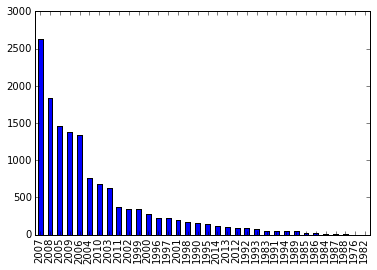

In [62]:
rt_metadf['year'].value_counts().plot(kind='bar')
rt_metadf['year'].value_counts().median()

13.0

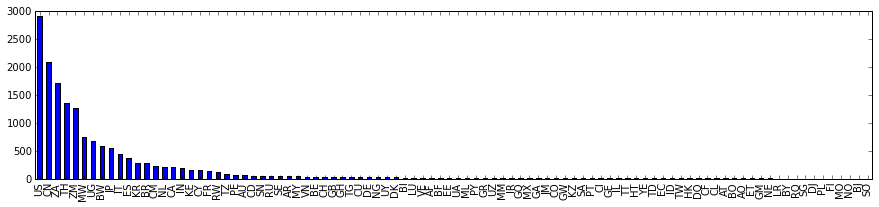

In [63]:
fig = plt.figure(figsize=(15,3))
rt_metadf['country'].value_counts().plot(kind='bar')
rt_metadf['country'].value_counts().quantile()

In [67]:
rt_metadf['year'].value_counts().to_csv('num_per_year.csv')
rt_metadf['country'].value_counts().to_csv('num_per_country.csv')